In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
pip install xgboost scikit-learn

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.shape

(32581, 12)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming your dataset is stored in a DataFrame named 'df'
X = df[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
        'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
        'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']]

y = df['loan_status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9349393892895504
Confusion Matrix:
[[5018   54]
 [ 370 1075]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.74      0.84      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.87      0.90      6517
weighted avg       0.94      0.93      0.93      6517



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


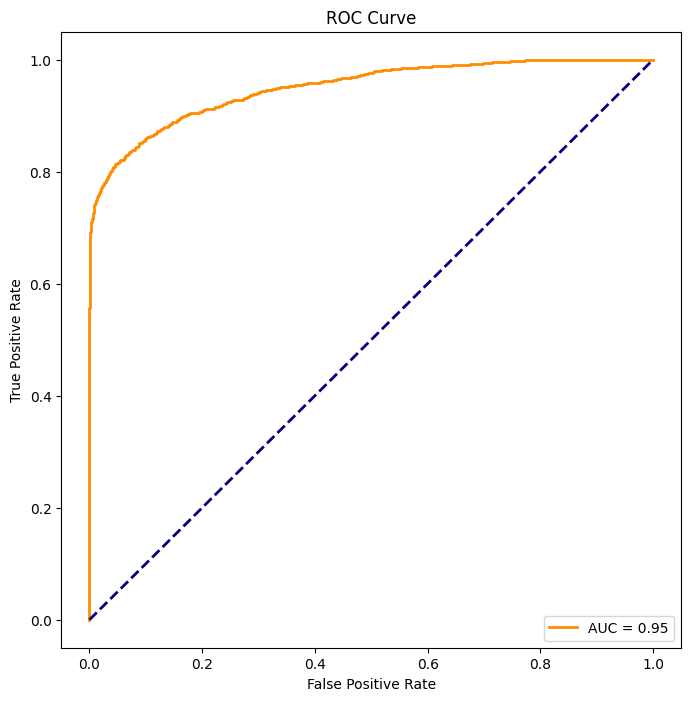

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you already have X_train, X_test, y_train, y_test, and the trained XGBoost model

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Let's create a new example for prediction
new_example = pd.DataFrame({
    'person_age': [28],
    'person_income': [60000],
    'person_home_ownership': ['OWN'],
    'person_emp_length': [3.0],
    'loan_intent': ['PERSONAL'],
    'loan_grade': ['B'],
    'loan_amnt': [12000],
    'loan_int_rate': [10.5],
    'loan_percent_income': [0.2],
    'cb_person_default_on_file': ['N'],
    'cb_person_cred_hist_length': [5]
})

# One-hot encode categorical variables
new_example_encoded = pd.get_dummies(new_example, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

# Ensure new_example_encoded has all the necessary columns
missing_columns = set(X_train.columns) - set(new_example_encoded.columns)
for col in missing_columns:
    new_example_encoded[col] = 0

# Reorder the columns to match the order during training
new_example_encoded = new_example_encoded[X_train.columns]

# Make predictions
new_example_pred_proba = model.predict_proba(new_example_encoded)[:, 1]

# Print the predicted probability
print(f'Predicted Probability of Default: {new_example_pred_proba[0]:.4f}')

Predicted Probability of Default: 0.0000
